In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chardet
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

Method being used is Support Vector Classification, K-Nearest Neighbors,and Random Forest Classification. As this problem is a classification type problem as such any classification type algorithm will work. Using these three algorithms, this problem will test which algorithm performs the best on this data.

In [2]:
with open('Overbuff_scraped_22-04-2019.csv', 'rb') as f:
    enc = chardet.detect(f.read())

In [3]:
df1 = pd.read_csv('Overbuff_scraped_22-04-2019.csv', encoding = enc['encoding'])

In [4]:
df2 = pd.read_csv('Overbuff_scraped_24-05-2020.csv', encoding = enc['encoding'])

In [5]:
result = df1.append(df2)

C:\Users\khous\AppData\Local\Temp\ipykernel_33056\3416078118.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = df1.append(df2)


In [6]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488 entries, 0 to 767
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hero        1488 non-null   object 
 1   Role        1488 non-null   object 
 2   Pick_rate   1488 non-null   float64
 3   Win_rate    1488 non-null   float64
 4   Tie_Rate    1488 non-null   float64
 5   On_fire     1488 non-null   float64
 6   Platform    1488 non-null   object 
 7   Rank        1488 non-null   object 
 8   Date        1488 non-null   object 
 9   Unnamed: 0  768 non-null    float64
dtypes: float64(5), object(5)
memory usage: 127.9+ KB


In [7]:
result.head(10)

,Hero,Role,Pick_rate,Win_rate,Tie_Rate,On_fire,Platform,Rank,Date,Unnamed: 0
0,Reinhardt,TANK,10.08,49.85,2.75,7.33,XBL,All,2019-04-22 18:54:56,NaN
1,Moira,SUPPORT,7.40,51.00,2.55,9.59,XBL,All,2019-04-22 18:54:56,NaN
2,Mercy,SUPPORT,6.57,49.88,2.64,1.80,XBL,All,2019-04-22 18:54:56,NaN
3,Lúcio,SUPPORT,6.18,52.36,2.18,13.16,XBL,All,2019-04-22 18:54:56,NaN
4,D.Va,TANK,5.64,51.49,2.34,7.84,XBL,All,2019-04-22 18:54:56,NaN
5,Baptiste,SUPPORT,5.04,49.11,2.47,11.99,XBL,All,2019-04-22 18:54:56,NaN
6,Zarya,TANK,4.44,48.85,2.47,10.05,XBL,All,2019-04-22 18:54:56,NaN
7,Orisa,TANK,4.27,55.28,2.60,8.85,XBL,All,2019-04-22 18:54:56,NaN
8,Ana,SUPPORT,4.04,47.95,2.35,9.26,XBL,All,2019-04-22 18:54:56,NaN
9,Roadhog,TANK,3.89,50.91,1.95,10.07,XBL,All,2019-04-22 18:54:56,NaN


In [8]:
result.tail()

,Hero,Role,Pick_rate,Win_rate,Tie_Rate,On_fire,Platform,Rank,Date,Unnamed: 0
763,Symmetra,SUPPORT,0.76,50.00,0.00,8.47,XBox,Grandmaster,2020-05-24 12:13:38.816996,27.0
764,Pharah,OFFENSE,0.76,60.81,0.00,20.39,XBox,Grandmaster,2020-05-24 12:13:38.816996,28.0
765,Mei,DEFENSE,0.74,41.43,2.78,4.77,XBox,Grandmaster,2020-05-24 12:13:38.816996,29.0
766,Winston,TANK,0.58,51.85,3.57,4.80,XBox,Grandmaster,2020-05-24 12:13:38.816996,30.0
767,Reaper,OFFENSE,0.54,70.00,3.85,10.70,XBox,Grandmaster,2020-05-24 12:13:38.816996,31.0


In [9]:
result.describe()

,Pick_rate,Win_rate,Tie_Rate,On_fire,Unnamed: 0
count,1488.000000,1488.000000,1488.000000,1488.000000,768.00000
mean,3.224167,50.521237,2.066962,9.458582,15.50000
std,2.523596,4.710143,0.614549,3.376191,9.23911
min,0.140000,13.330000,0.000000,1.080000,0.00000
25%,1.487500,47.897500,1.750000,7.350000,7.75000
50%,2.390000,50.635000,2.070000,9.365000,15.50000
75%,4.110000,53.532500,2.440000,11.527500,23.25000
max,15.230000,70.000000,5.080000,20.910000,31.00000


In [10]:
result.corr()

,Pick_rate,Win_rate,Tie_Rate,On_fire,Unnamed: 0
Pick_rate,1.000000,0.022422,0.180677,-0.142070,-0.861444
Win_rate,0.022422,1.000000,0.122209,0.222656,0.010152
Tie_Rate,0.180677,0.122209,1.000000,0.098003,-0.151495
On_fire,-0.142070,0.222656,0.098003,1.000000,0.065508
Unnamed: 0,-0.861444,0.010152,-0.151495,0.065508,1.000000


In [11]:
result = result.drop(["Unnamed: 0"], axis = 1)

In [12]:
result

,Hero,Role,Pick_rate,Win_rate,Tie_Rate,On_fire,Platform,Rank,Date
0,Reinhardt,TANK,10.08,49.85,2.75,7.33,XBL,All,2019-04-22 18:54:56
1,Moira,SUPPORT,7.40,51.00,2.55,9.59,XBL,All,2019-04-22 18:54:56
2,Mercy,SUPPORT,6.57,49.88,2.64,1.80,XBL,All,2019-04-22 18:54:56
3,Lúcio,SUPPORT,6.18,52.36,2.18,13.16,XBL,All,2019-04-22 18:54:56
4,D.Va,TANK,5.64,51.49,2.34,7.84,XBL,All,2019-04-22 18:54:56
...,...,...,...,...,...,...,...,...,...
763,Symmetra,SUPPORT,0.76,50.00,0.00,8.47,XBox,Grandmaster,2020-05-24 12:13:38.816996
764,Pharah,OFFENSE,0.76,60.81,0.00,20.39,XBox,Grandmaster,2020-05-24 12:13:38.816996
765,Mei,DEFENSE,0.74,41.43,2.78,4.77,XBox,Grandmaster,2020-05-24 12:13:38.816996
766,Winston,TANK,0.58,51.85,3.57,4.80,XBox,Grandmaster,2020-05-24 12:13:38.816996


In [13]:
result.to_csv("Result.csv")

In [14]:
encoder1 = OrdinalEncoder()

In [15]:
role = result["Role"].to_numpy()
hero = result["Hero"].to_numpy()
for i in range(len(role)):
    if (hero[i] == "Symmetra"):
        role[i] = "DAMAGE"
    elif(hero[i] == "Torbjörn"):
        role[i] = "DAMAGE"
    elif(hero[i] == "Mei"):
        role[i] = "DAMAGE"
    elif(hero[i] == "Bastion"):
        role[i] = "DAMAGE"
    elif(hero[i] == "Widowmaker"):
        role[i] = "DAMAGE"
    elif(hero[i] == "Junkrat"):
        role[i] = "DAMAGE"
    elif(hero[i] == "Hanzo"):
        role[i] = "DAMAGE"
for i in range(len(role)):
    if(role[i] == "OFFENSE"):
        role[i] = "DAMAGE"
for i in range(len(hero)):
    print(hero[i], role[i])

Reinhardt TANK
Moira SUPPORT
Mercy SUPPORT
Lúcio SUPPORT
D.Va TANK
Baptiste SUPPORT
Zarya TANK
Orisa TANK
Ana SUPPORT
Roadhog TANK
Hanzo DAMAGE
Wrecking Ball TANK
Junkrat DAMAGE
Genji DAMAGE
Reaper DAMAGE
Zenyatta SUPPORT
McCree DAMAGE
Widowmaker DAMAGE
Soldier: 76 DAMAGE
Ashe DAMAGE
Brigitte SUPPORT
Torbjörn DAMAGE
Winston TANK
Sombra DAMAGE
Symmetra DAMAGE
Tracer DAMAGE
Mei DAMAGE
Doomfist DAMAGE
Pharah DAMAGE
Bastion DAMAGE
Moira SUPPORT
Mercy SUPPORT
D.Va TANK
Orisa TANK
Lúcio SUPPORT
Reinhardt TANK
Sombra DAMAGE
Baptiste SUPPORT
Zenyatta SUPPORT
Symmetra DAMAGE
Junkrat DAMAGE
Brigitte SUPPORT
Wrecking Ball TANK
Ashe DAMAGE
Pharah DAMAGE
Soldier: 76 DAMAGE
Doomfist DAMAGE
Bastion DAMAGE
Reaper DAMAGE
Mei DAMAGE
Widowmaker DAMAGE
Roadhog TANK
McCree DAMAGE
Hanzo DAMAGE
Tracer DAMAGE
Ana SUPPORT
Torbjörn DAMAGE
Genji DAMAGE
Zarya TANK
Winston TANK
Moira SUPPORT
Mercy SUPPORT
D.Va TANK
Reinhardt TANK
Lúcio SUPPORT
Orisa TANK
Junkrat DAMAGE
Baptiste SUPPORT
Reaper DAMAGE
Zenyatta SUPPO

Doomfist DAMAGE
Bastion DAMAGE
Reinhardt TANK
Mercy SUPPORT
Lúcio SUPPORT
Moira SUPPORT
Orisa TANK
Roadhog TANK
Baptiste SUPPORT
Zarya TANK
D.Va TANK
Ana SUPPORT
Hanzo DAMAGE
McCree DAMAGE
Wrecking Ball TANK
Genji DAMAGE
Soldier: 76 DAMAGE
Widowmaker DAMAGE
Zenyatta SUPPORT
Ashe DAMAGE
Reaper DAMAGE
Sombra DAMAGE
Pharah DAMAGE
Winston TANK
Tracer DAMAGE
Torbjörn DAMAGE
Junkrat DAMAGE
Brigitte SUPPORT
Doomfist DAMAGE
Symmetra DAMAGE
Mei DAMAGE
Bastion DAMAGE
Mercy SUPPORT
Orisa TANK
Reinhardt TANK
Roadhog TANK
Lúcio SUPPORT
Baptiste SUPPORT
Hanzo DAMAGE
Zarya TANK
Wrecking Ball TANK
Soldier: 76 DAMAGE
Widowmaker DAMAGE
Ana SUPPORT
McCree DAMAGE
Pharah DAMAGE
Moira SUPPORT
D.Va TANK
Genji DAMAGE
Sombra DAMAGE
Ashe DAMAGE
Zenyatta SUPPORT
Torbjörn DAMAGE
Tracer DAMAGE
Doomfist DAMAGE
Reaper DAMAGE
Symmetra DAMAGE
Junkrat DAMAGE
Winston TANK
Brigitte SUPPORT
Bastion DAMAGE
Mei DAMAGE
Mercy SUPPORT
Orisa TANK
Roadhog TANK
Hanzo DAMAGE
Soldier: 76 DAMAGE
Lúcio SUPPORT
Pharah DAMAGE
Baptiste 

Hanzo DAMAGE
D.Va TANK
Genji DAMAGE
Doomfist DAMAGE
Mei DAMAGE
Zenyatta SUPPORT
Symmetra DAMAGE
Sombra DAMAGE
Winston TANK
Pharah DAMAGE
Bastion DAMAGE
Reinhardt TANK
Moira SUPPORT
Mercy SUPPORT
Ana SUPPORT
McCree DAMAGE
Ashe DAMAGE
Roadhog TANK
Sigma TANK
Zarya TANK
LÃºcio SUPPORT
Brigitte SUPPORT
Wrecking Ball TANK
Orisa TANK
Tracer DAMAGE
Widowmaker DAMAGE
TorbjÃ¶rn DEFENSE
Echo DAMAGE
Soldier: 76 DAMAGE
Hanzo DAMAGE
Baptiste SUPPORT
Doomfist DAMAGE
Bastion DAMAGE
Zenyatta SUPPORT
Sombra DAMAGE
Genji DAMAGE
D.Va TANK
Junkrat DAMAGE
Symmetra DAMAGE
Pharah DAMAGE
Mei DAMAGE
Winston TANK
Reaper DAMAGE


In [16]:
result["Role"] = role

In [17]:
role = result["Role"].to_numpy()
hero = result["Hero"].to_numpy()
for i in range(len(hero)):
    if(role[i] == "DEFENSE"):
        hero[i] = "Torbjörn"
        role[i] = "DAMAGE"
result["Hero"] = hero
result["Role"] = role
result.to_csv("Result.csv")

In [18]:
role = result[["Role"]]
encoder1.fit(role)
role = encoder1.transform(role)

In [19]:
result['Role_encoded'] = role

In [20]:
encoder2 = OrdinalEncoder()
hero = result[["Hero"]]
encoder2.fit(hero)
hero = encoder2.transform(hero)

In [21]:
result['Hero_encoded'] = hero

In [22]:
result.head()

,Hero,Role,Pick_rate,Win_rate,Tie_Rate,On_fire,Platform,Rank,Date,Role_encoded,Hero_encoded
0,Reinhardt,TANK,10.08,49.85,2.75,7.33,XBL,All,2019-04-22 18:54:56,2.0,20.0
1,Moira,SUPPORT,7.40,51.00,2.55,9.59,XBL,All,2019-04-22 18:54:56,1.0,16.0
2,Mercy,SUPPORT,6.57,49.88,2.64,1.80,XBL,All,2019-04-22 18:54:56,1.0,15.0
3,Lúcio,SUPPORT,6.18,52.36,2.18,13.16,XBL,All,2019-04-22 18:54:56,1.0,12.0
4,D.Va,TANK,5.64,51.49,2.34,7.84,XBL,All,2019-04-22 18:54:56,2.0,5.0


In [23]:
result.corr()

,Pick_rate,Win_rate,Tie_Rate,On_fire,Role_encoded,Hero_encoded
Pick_rate,1.000000,0.022422,0.180677,-0.142070,0.454403,-0.072200
Win_rate,0.022422,1.000000,0.122209,0.222656,-0.003843,0.001276
Tie_Rate,0.180677,0.122209,1.000000,0.098003,0.056537,-0.113254
On_fire,-0.142070,0.222656,0.098003,1.000000,-0.343330,-0.225846
Role_encoded,0.454403,-0.003843,0.056537,-0.343330,1.000000,0.210411
Hero_encoded,-0.072200,0.001276,-0.113254,-0.225846,0.210411,1.000000


In [24]:
encoder3 = OrdinalEncoder()
console = result[["Platform"]]
encoder3.fit(console)
console = encoder3.transform(console)
result['Platform_encoded'] = console

In [25]:
encoder4 = OrdinalEncoder()
rank = result[["Rank"]]
encoder4.fit(rank)
rank = encoder4.transform(rank)
result['Rank_encoded'] = rank

In [26]:
result.head()

,Hero,Role,Pick_rate,Win_rate,Tie_Rate,On_fire,Platform,Rank,Date,Role_encoded,Hero_encoded,Platform_encoded,Rank_encoded
0,Reinhardt,TANK,10.08,49.85,2.75,7.33,XBL,All,2019-04-22 18:54:56,2.0,20.0,2.0,0.0
1,Moira,SUPPORT,7.40,51.00,2.55,9.59,XBL,All,2019-04-22 18:54:56,1.0,16.0,2.0,0.0
2,Mercy,SUPPORT,6.57,49.88,2.64,1.80,XBL,All,2019-04-22 18:54:56,1.0,15.0,2.0,0.0
3,Lúcio,SUPPORT,6.18,52.36,2.18,13.16,XBL,All,2019-04-22 18:54:56,1.0,12.0,2.0,0.0
4,D.Va,TANK,5.64,51.49,2.34,7.84,XBL,All,2019-04-22 18:54:56,2.0,5.0,2.0,0.0


In [27]:
result.corr()

,Pick_rate,Win_rate,Tie_Rate,On_fire,Role_encoded,Hero_encoded,Platform_encoded,Rank_encoded
Pick_rate,1.000000,0.022422,0.180677,-0.142070,0.454403,-0.072200,-5.662575e-03,-1.978806e-03
Win_rate,0.022422,1.000000,0.122209,0.222656,-0.003843,0.001276,-3.574566e-02,8.831763e-02
Tie_Rate,0.180677,0.122209,1.000000,0.098003,0.056537,-0.113254,-1.027063e-02,1.216960e-02
On_fire,-0.142070,0.222656,0.098003,1.000000,-0.343330,-0.225846,4.321902e-02,1.343569e-02
Role_encoded,0.454403,-0.003843,0.056537,-0.343330,1.000000,0.210411,7.361081e-04,-1.410312e-03
Hero_encoded,-0.072200,0.001276,-0.113254,-0.225846,0.210411,1.000000,-2.693436e-03,-1.211541e-03
Platform_encoded,-0.005663,-0.035746,-0.010271,0.043219,0.000736,-0.002693,1.000000e+00,-4.745590e-17
Rank_encoded,-0.001979,0.088318,0.012170,0.013436,-0.001410,-0.001212,-4.745590e-17,1.000000e+00


Based off the corrolation matrix, pick rate, on fire, and hero names (which is encoded as Hero_encoded) are the highest corrolated features to our target value which is Role. Adding in Win_rate to see if this affects the accuracy. The target column is the Role column. All other columns beside ones metioned earlier are being dropped.

In [28]:
Y = result["Role"]

In [29]:
X = result.loc[:, ["Pick_rate", "On_fire", "Hero_encoded", "Win_rate"]]
X

,Pick_rate,On_fire,Hero_encoded,Win_rate
0,10.08,7.33,20.0,49.85
1,7.40,9.59,16.0,51.00
2,6.57,1.80,15.0,49.88
3,6.18,13.16,12.0,52.36
4,5.64,7.84,5.0,51.49
...,...,...,...,...
763,0.76,8.47,25.0,50.00
764,0.76,20.39,18.0,60.81
765,0.74,4.77,14.0,41.43
766,0.58,4.80,29.0,51.85


Text(0.5, 1.0, 'Distribution of Win rates')

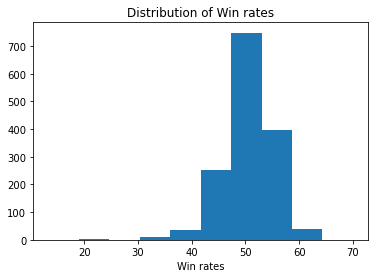

In [30]:
plt.hist(result["Win_rate"])
plt.xlabel("Win rates")
plt.title("Distribution of Win rates")

Text(0.5, 1.0, 'Distribution of Pick rate')

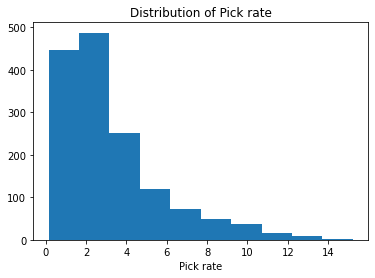

In [31]:
plt.hist(result["Pick_rate"])
plt.xlabel("Pick rate")
plt.title("Distribution of Pick rate")

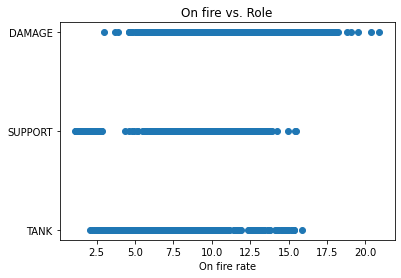

In [32]:
plt.scatter(result["On_fire"].to_numpy(), result["Role"].to_numpy())
plt.xlabel("On fire rate")
plt.title("On fire vs. Role")
plt.show()

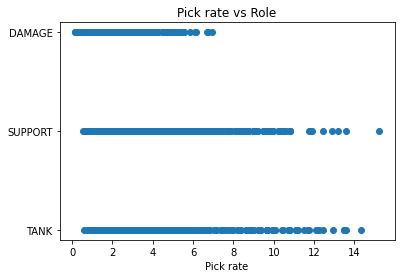

In [33]:
plt.scatter(result["Pick_rate"].to_numpy(), result["Role"].to_numpy())
plt.xlabel("Pick rate")
plt.title("Pick rate vs Role")
plt.show()

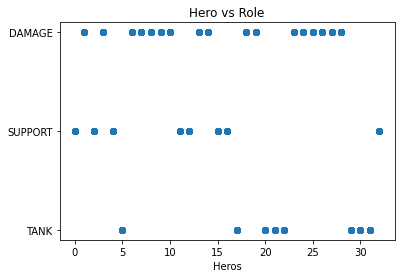

In [34]:
plt.scatter(result["Hero_encoded"].to_numpy(), result["Role"].to_numpy())
plt.xlabel("Heros")
plt.title("Hero vs Role")
plt.show()

Support Vector Machines are highly efficient in memory management, along with being effective on smaller data sets. Also works very well with clear margins of separations between classes. A SVC will work well with this data as the data small, and there are clear margins of separation between the classes (Ray, 2021).

In [35]:
svc = SVC()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3) 

In [37]:
svc.fit(X_train, y_train)

SVC()

In [38]:
pred_test = svc.predict(X_test)

In [39]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      DAMAGE       0.72      0.92      0.81       232
     SUPPORT       0.64      0.22      0.33        95
        TANK       0.59      0.57      0.58       120

    accuracy                           0.68       447
   macro avg       0.65      0.57      0.57       447
weighted avg       0.67      0.68      0.64       447



In [40]:
param_grid = {'C': [1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf']} 

In [41]:
grid = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 5)

In [42]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.718 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.697 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.736 total time=   0.1s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.688 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.976 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.942 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.942 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.957 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=1, kernel=linear;, score=0.727 total time=  21.8s
[CV 2/5] END ....C=1000, gamma=1, kernel=linear;

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['linear', 'rbf']},
                   verbose=5)

In [43]:
print(grid.best_params_)

{'kernel': 'rbf', 'gamma': 0.1, 'C': 100}


In [44]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.1)


In [45]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

      DAMAGE       0.96      0.99      0.98       232
     SUPPORT       0.98      0.93      0.95        95
        TANK       0.99      0.97      0.98       120

    accuracy                           0.97       447
   macro avg       0.98      0.96      0.97       447
weighted avg       0.97      0.97      0.97       447



In [46]:
svc = SVC(C = 10, kernel='rbf', gamma = 0.1)

In [47]:
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [48]:
pred_test = svc.predict(X_test)

In [49]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      DAMAGE       0.96      0.99      0.98       232
     SUPPORT       0.98      0.93      0.95        95
        TANK       0.99      0.97      0.98       120

    accuracy                           0.97       447
   macro avg       0.98      0.96      0.97       447
weighted avg       0.97      0.97      0.97       447



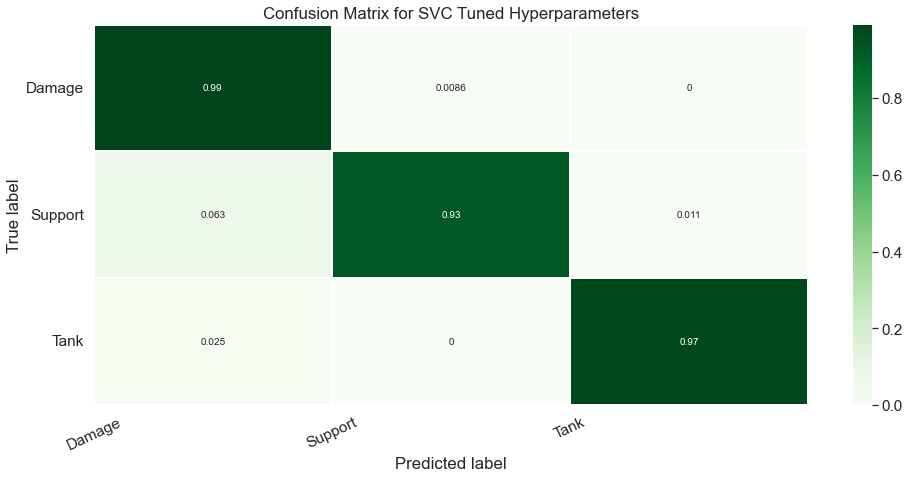

In [50]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Damage', 'Support', "Tank"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVC Tuned Hyperparameters')
plt.show()

 KNN is a very simple and easy to implement algorithm, and works well with multiclass classification problems, as this data set has three classes (Genesis, 2018).

In [51]:
knn = KNeighborsClassifier()

In [52]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
pred_test = knn.predict(X_test)

In [54]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      DAMAGE       0.95      0.98      0.96       232
     SUPPORT       0.96      0.92      0.94        95
        TANK       0.97      0.95      0.96       120

    accuracy                           0.96       447
   macro avg       0.96      0.95      0.95       447
weighted avg       0.96      0.96      0.96       447



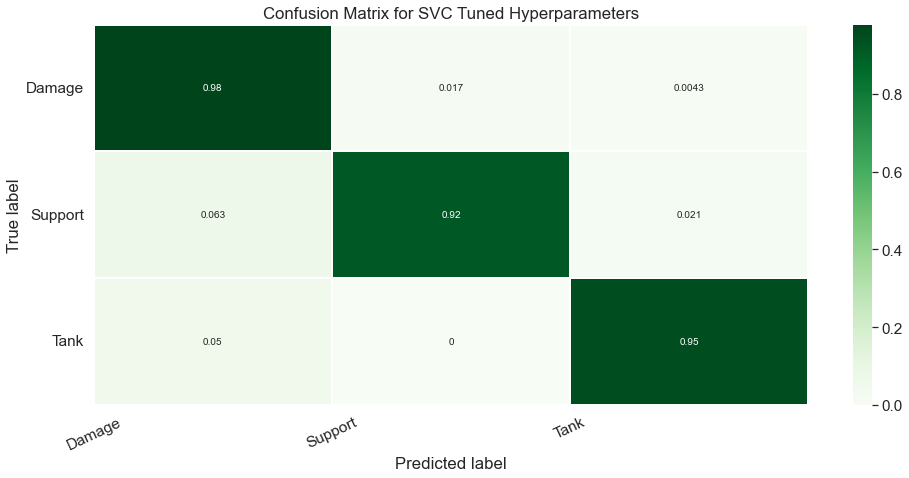

In [55]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Damage', 'Support', "Tank"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVC Tuned Hyperparameters')
plt.show()

 Random Forests is easy to implement like KNN, but is more robust, and less likely to overfit the data. This makes it powerful tool for classification, a reason why it's being used (Team, T.A.I, 2020).

In [56]:
rfc = RandomForestClassifier()

In [57]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
pred_test = rfc.predict(X_test)

In [59]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      DAMAGE       0.96      1.00      0.98       232
     SUPPORT       0.99      0.96      0.97        95
        TANK       1.00      0.95      0.97       120

    accuracy                           0.98       447
   macro avg       0.98      0.97      0.97       447
weighted avg       0.98      0.98      0.98       447



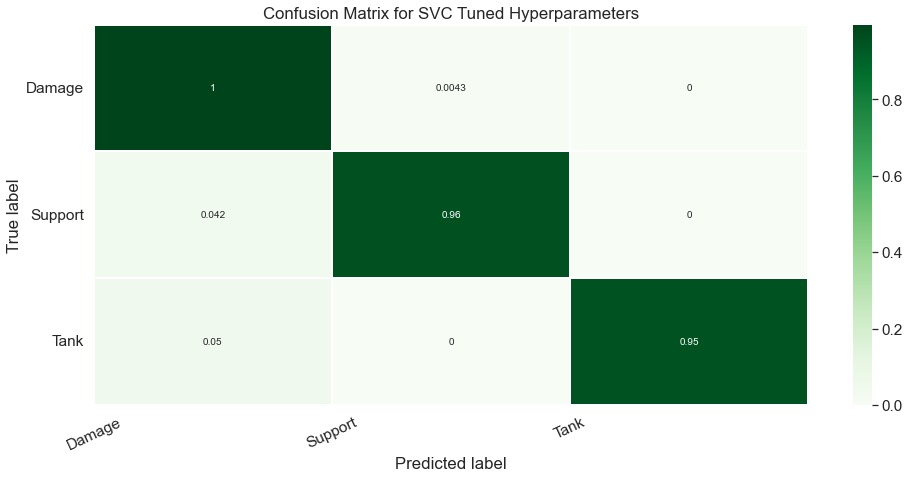

In [60]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Damage', 'Support', "Tank"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVC Tuned Hyperparameters')
plt.show()

These all have their own cons, SVMs don’t perform well when the data has more noise, for example target classes overlapping each other, and decreased effectiveness if the data set was larger (Ray, 2021). KNN is a slow, and can’t handle imbalance classes, in this data the largest class is the damage class, while tank and support roughly the same size (Genesis, 2018). Random Forests are slow like KNN, but they are also found to be biased towards the categorical variable, which in this data set there are multiple, but the hero names are the ones being used for the machine learning (Team, T.A.I, 2020). 


References

Genesis. (2018, September 25). Pros and cons of K-nearest neighbors. From The GENESIS. Retrieved October 17, 2022, from https://www.fromthegenesis.com/pros-and-cons-of-k-nearest-neighbors/ 
Ray, S. (2021, August 26). SVM: Support Vector Machine algorithm in machine learning. Analytics Vidhya. Retrieved October 17, 2022, from https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/ 
Team, T. A. I. (2020, November 17). Why choose Random Forest and not decision trees. Towards AI. Retrieved October 17, 2022, from https://towardsai.net/p/machine-learning/why-choose-random-forest-and-not-decision-trees 
